In [1]:
# compare the population series extracted from Tobias' gridded population and in the SspDb file at the "start year" 2010
# compare SSP2 and SSP5 differences at the "start year" 2010

%matplotlib widget

import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

import tc_cost.util.constants as u_const
import tc_cost.util.data as u_data

In [2]:
ds_temp = u_data.load_hist_temp()
ds_temp = ds_temp.sel(ISO=(ds_temp["ISO"] != "GRL"))
l_countries = ds_temp["ISO"].values

In [3]:
ds_ssp = u_data.load_ssp_data().sel(ISO=l_countries)

Loading cached data from /home/tovogt/code/tc_cost/data/cache/SspDb_GDP_POP_OECD_Env-Growth.nc ...


In [4]:
da_pop = xr.combine_nested([
    u_data.load_ssp_pop_from_grid(ssp)
    for ssp in ds_ssp["SSP"].values
], concat_dim=["SSP"]).sel(ISO=l_countries)
da_pop["SSP"] = ds_ssp["SSP"].values
ds_ssp["gridpop"] = da_pop

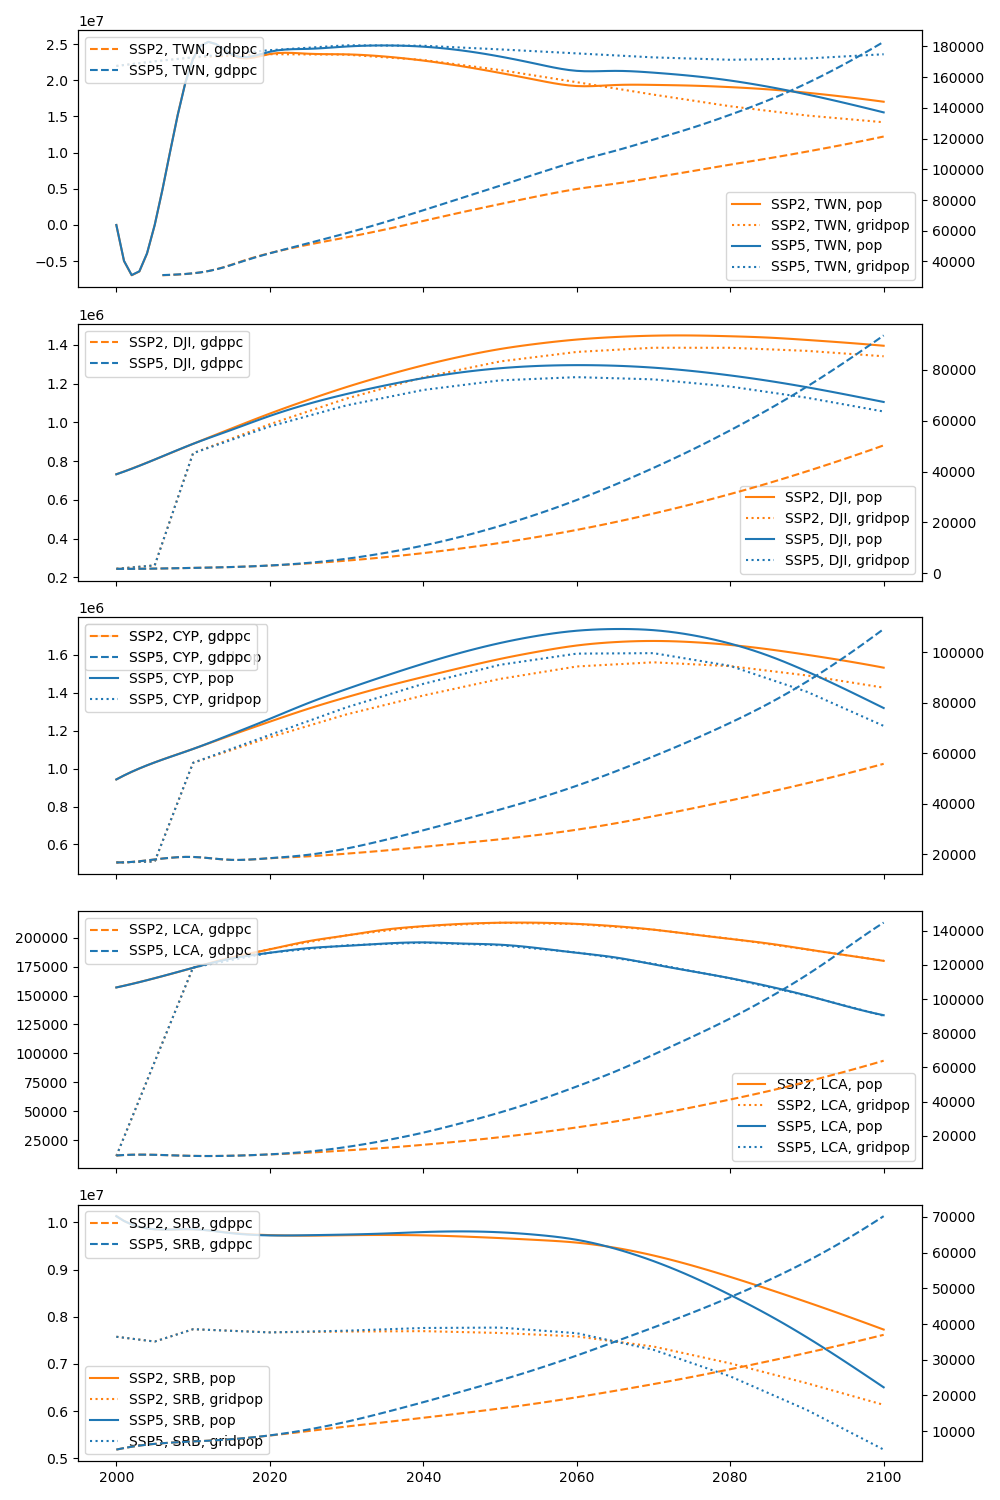

In [5]:
plt.close("all")
fig = plt.figure(figsize=(10, 15))
axs = fig.subplots(5, 1, sharex=True)

colors = {
    "SSP2": "tab:orange",
    "SSP5": "tab:blue",
}

l_countries = (
    (
        np.abs(ds_ssp["pop"] - ds_ssp["gridpop"])
        / ds_ssp["pop"]
    ).sel(year=np.arange(2005, 2010))
    .mean(dim="year")
    .max(dim="SSP")
    .to_series()
    .sort_values(ascending=False)
    .index
)

for ax, iso in zip(axs, l_countries[:5]):
    ax2 = ax.twinx()
    for ssp in u_const.L_SSP:
        ax.plot(
            ds_ssp["year"],
            ds_ssp["pop"].sel(SSP=ssp, ISO=iso),
            label=f"{ssp}, {iso}, pop",
            color=colors[ssp],
        )
        ax.plot(
            ds_ssp["year"],
            ds_ssp["gridpop"].sel(SSP=ssp, ISO=iso),
            label=f"{ssp}, {iso}, gridpop",
            color=colors[ssp],
            linestyle=":",
        )
        ax2.plot(
            ds_ssp["year"],
            ds_ssp["gdppc"].sel(SSP=ssp, ISO=iso),
            label=f"{ssp}, {iso}, gdppc",
            color=colors[ssp],
            linestyle="--",
        )
    ax.legend()
    ax2.legend()

fig.tight_layout()

In [6]:
# the relative difference between SSP2 and SSP5 is 0 for all countries
# except TWN (which is probably a mistake, and it's less than 0.2%)
ds_ssp_diff = np.abs(
    ds_ssp["pop"].sel(SSP="SSP2")
    - ds_ssp["pop"].sel(SSP="SSP5")
) / ds_ssp["pop"].sel(SSP="SSP2")
ds_ssp_diff.sel(year=2010).to_series().sort_values(ascending=False)

ISO
TWN    0.001911
AFG    0.000000
MUS    0.000000
MYS    0.000000
NAM    0.000000
         ...   
GIN    0.000000
GMB    0.000000
GNB    0.000000
GNQ    0.000000
ZWE    0.000000
Name: pop, Length: 173, dtype: float64